# Тематическое моделирование

**Тематическое моделирование** — технология статистического анализа текстов для автоматического выявления тематики в больших коллекциях документов

**Тематическая модель** (англ. topic model) — модель коллекции текстовых документов, которая определяет, к каким темам относится каждый документ и какие слова (термины, термы) образуют каждую тему. Для этого не требуется никакой ручной разметки текстов, обучение модели происходит без учителя.

Чем-то похоже на кластеризацию, но тематическое моделирование в этом плане является «мягким» и допускает, чтобы документ относился к нескольким кластерам-темам. Тематическое моделирование не претендует на понимание смысла текста, однако оно способно отвечать на вопросы «о чём этот текст» или «какие общие темы имеет эта пара текстов».

Тематическая модель формирует сжатое векторное представление текста, которое помогает классифицировать, рубрицировать, аннотировать, сегментировать тексты. В отличие от известных векторных представлений семейства x2vec (word2vec, paragraph2vec, graph2vec и т.д.), в тематических векторах каждая координата соответствует теме и имеет содержательную интерпретацию. Модель привязывает к каждой теме список ключевых слов или фраз, который описывает семантику этой темы. 

Тему нельзя строго определить ни семантически, ни эпистемологически. Темы выявляются исключительно с помощью автоматического подсчета правдоподобия совестной встречаемости слов. Слово может быть отнесено к нескольким темам, но с разной вероятностью, но слова-соседи для каждой темы у него будут разными. Высокочастотные служебные слова будут иметь примерно одинаковую вероятность для всех тем.


### Зачем это нужно?

* разведочный информационный поиск (exploratory search) в электронных библиотеках;
* поиск по смыслу, а не по ключевым словам;
* обнаружение и отслеживание событий в новостных потоках;
* выявление тематических сообществ в социальных сетях;
* построение профилей интересов пользователей в рекомендательных системах;
* категоризация интентов в системах разговорного интеллекта;
* поиск мотивов в нуклеотидных и аминокислотных последовательностях;
* аннотирование изображений;
* поиск аномального поведения объектов в видеопотоке;
* выявление паттернов поведения клиетов по транзакционным данным. 

### Построение тематической модели документа 

* $p(w|t)$ — матрица искомых условных распределений слов по темам 
* $p(t|d)$— матрица искомых условных распределений тем по документам
* $d$ — документ
* $w$ — слово
* $d, w$ — наблюдаемые переменные 
* $t$ — тема (скрытая переменная)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png/1280px-%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png' width='600' align='left'>


### Виды тематических моделей

* LSA (LSI)
* pLSA (pLSI)
* LDA
* ARTM
* ...

### Подробнее о тематических моделях

* [Кратко, но с формулами](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)
* [Подробный обзор тематических моделей от К.В. Воронцова](http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf)

## LSA (LSI)

**Латентно-семантический анализ**, **LSA** *(latent semantic analysis)*, он же **LSI** *(latent semantic indexing)* — самая ранняя модель, предложенная еще в конце 80-х гг. Модель называется латентной, т.к. предполагает введение скрытого (латентного) параметра — темы.

Ниже — анимация процесса обнаружения тематик в матрице «терм-документ». Каждый столбец матрицы соответствует документу, каждая строка — слову. Ячейки матрицы содержат веса слов в документах (например, значения TF-IDF), более тёмные оттенки соответствуют более высокому весу. Алгоритм LSA группирует как документы, которые используют похожие слова, так и слова, которые встречаются в похожем наборе документов. Полученные кластеры в матрице используются для обнаружения латентных (скрытых) компонентов в исходных данных, соответствующих определённым тематикам.

![](img/lsa.gif)

Наиболее распространенный вариант LSA основан на использовании сингулярного разложения матрицы (см. [тетрадку про снижение размерности](https://github.com/ancatmara/data-science-nlp/blob/master/3.%20DimReduction.ipynb)). С помощью SVD-разложения любая матрица раскладывается во множество ортогональных матриц, линейная комбинация которых является достаточно точным приближением к исходной матрице. Этим и объясняется название этого алгоритма в `sklearn` — `TruncaredSVD`.

Вспомним формулу сингулярного разложения: 

$A = U\Sigma V^{T}$

Особенность такого разложения в том, что если в матрице $\Sigma$ оставить только $k$ наибольших сингулярных значений, а в матрицах $U$ и $V$ — только соответствующие этим значениям столбцы, то произведение получившихся матриц $\Sigma$, $U$ и $V$ будет наилучшим приближением исходной матрицы $A$ к матрице $\hat{A}$ ранга $k$.

$\hat{A}\approx A = U\Sigma V^{T}$

Основная идея LSA в том, что если в качестве матрицы $A$ использовать матрицу «терм-документ», то матрица  $\hat{A}$ отражает основную структуру различных зависимостей, присутствующих в исходной матрице. Эту структуру определяют веса термов. Таким образом, каждый терм и документ представляются при помощи векторов в общем пространстве размерности $k$ (т.н. пространстве гипотез). Близость между любой комбинацией термов и/или документов легко вычисляется при помощи скалярного произведения векторов.

[Подробнее об алгоритме](https://en.wikipedia.org/wiki/Latent_semantic_analysis) (по-английски).


## pLSA (pLSI)

**pLSA** *(probabilistic latent semantic analysis)*, она же **pLSI** *(probabilistic latent semantic indexing)* — вероятностный латентно-семантический анализ (индексирование). Модель предложена в 1999 г. Томасом Хоффманом, [вот оригинальная статья](https://web.archive.org/web/20101214074049/http://www.cs.brown.edu/~th/papers/Hofmann-SIGIR99.pdf). 

Зачем понадобилось модифицировать LSA? Проблема этого метода в том, что он предполагает, что слова и документы имеют нормальное распределение, но в реальности это не так. Поэтому на практике чаще используется pLSA, основанный на мультиномиальном распределении. Если LSA — это чистая линейная алгебра, то pLSA имеет еще и статистические основания.

Согласно pLSA, совместная встречаемость терма и документа $(w, d)$ моделируется как сочетание независимых мультиномиальных распределений, где $c$ — тема. Количество тем — это гиперпараметр, который выбирается до начала анализа. 

$$ P(w, d)=\sum_{c} P(c) P(d | c) P(w | c)=P(d) \sum_{c} P(c | d) P(w | c)$$

Ниже — схема алгоритма в т.н. *plate notation*. Прямоугольники на схеме — повторяющиеся элементы, внешний прямоугольник — документы, внутренний — позиции повторяющихся слов в данном документе. Т.е. такая схема показывает один документ, но справедлива для каждого.

<img src="img/plsi.png" width="400" align="left" style="padding-right: 50px; ">


* $d$ — индекс документа
* $c$ — тема, к которой принадлежит слово, полученная из распределения тем по документам $P(c|d)$
* $w$ — слово, полученное из распределения слов по теме, к которой оно принадлежит $P(w|c)$
* $d$ и $w$ — наблюдаемые переменные
* $c$ — скрытая переменная.


[Подробнее о алгоритме](http://www.machinelearning.ru/wiki/index.php?title=%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B0%D1%82%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%B5%D0%BC%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) (осторожно, много формул!)



## LDA

**LDA** *(Latent Dirichlet Allocation)*, латентное размещение Дирихле — генеративная вероятностная модель корпуса текстов. Самая распространенная модель, разработана в 2002-2003 гг. ([вот оригинальная статья](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf) David Blei, Andrew Ng, Michael I. Jordan). Это следующий шаг в развитии тематических моделей, где устранены недостатки pLSA (легко переобучается; при добавлении документа в коллекцию надо все пересчитывать заново). *Сейчас эта тематическая модель используется шире всего.*

В LDA каждый документ может рассматриваться как набор случайных скрытых тем, где каждая тема определяется распределением слов, при этом каждое слово в конкретном документе можно отнести к одной из его тем. Подобный подход схож с pLSA с той разницей, что в LDA качестве априорного распределения для тем используется распределение Дирихле. Это улучшает качество получающихся тем. 
 
<img src="img/LDA.png" width="400" align="left" style="padding-right: 50px; ">

* $M$ — количество документов
* $N$ — количество слов в документе
* $\alpha$ — параметр априорного распределения Дирихле на подокументном распределении тем
* $\beta$ — параметр априорного распределения Дирихле на потемном распределении слов 
* $\theta _{i}$  — распределение тем для документа i
* $\varphi _{k}$ — распределение слов для темы k
* $ z_{ij}$  — тема, к которой принадлежит j-тое слово в документе i
* $w_{ij}$ — конкретное слово

<br>

То, что $W$ закрашено серым, означает, что единственные наблюдаемые переменные — $w_{ij}$ и $z_{ij}$ , а остальные являются скрытыми.

Подробнее о алгоритме [здесь](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

## BigARTM

*ARTM — Additive Regularization for Topic Modeling*

**BigARTM** — библиотека с открытым кодом для тематического моделирования больших коллекций текстовых документов и массивов транзакционных данных. Эффективная потоковая параллельная реализация вероятностного тематического моделирования на основе аддитивной регуляризации.

> Аддитивная регуляризация (ARTM) позволяет задать сразу несколько критериев-регуляризаторов. Например, чтобы построить тематическую модель новостного потока, необходимо учесть несколько верхних уровней уже имеющегося рубрикатора, научить модель учитывать время документов, разделять темы на подтемы и создавать новые темы по необходимости. ARTM позволяет складывать регуляризаторы от разных моделей, создавая комбинации моделей с заданными свойствами под конкретные приложения. Это приводит к модульной технологии тематического моделирования с высокой степенью повторного использования кода.

Зачем нужно что-то еще, если есть LDA? Проблема в том, что задача тематического моделирования имеет очень много (бесконечно много) решений, и LDA выбирает одно из них, не предоставляя никаких средств для выбора лучшего решения под конкретную задачу. 

<img src= "img/artm.jpg" width="300" align="right" style="padding-right: 50px;">

BigARTM реализует несколько механизмов, которые снимают многие ограничения простых моделей типа PLSA или LDA и расширяют спектр приложений тематического моделирования.

* Regularization. Регуляризаторы, которые можно комбинировать в любых сочетаниях.
* Modality. Модальности, которыми можно описывать нетекстовые объекты внутри документов.
* Hierarchy. Тематические иерархии, в которых темы разделяются на подтемы.
* Intratext. Обработка текста как последовательности тематических векторов слов.
* Co-occurrence. Использование данных о совместной встречаемости слов.
* Hypergraph. Тематизация сложно структурированных транзакционных данных. 

#### Подробнее

* [Кратко и понятно](http://www.machinelearning.ru/wiki/index.php?title=BigARTM), цитата была отсюда
* [Сайт проекта BigARTM](http://bigartm.org/)
* [Документация BigARTM](http://docs.bigartm.org/en/stable/index.html)
* [Репозиторий](https://github.com/bigartm/bigartm)
* [Тьюториалы от авторов библиотеки](https://github.com/bigartm/bigartm-book)
* [В обзоре Воронцова](http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf) тоже об этом немало, стр. 55-65


# Практическая часть

In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer, LabelEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Данные

В качестве примера возьмем статьи из газеты «Полярный круг» (г. Салехард, Якутия) за 2014-2017 гг. Каждая статья — отдельный документ. Тексты заранее лемматизированы, осталось убрать из них пунктуацию и стоп-слова. Затем представим наш корпус в виде массива документов, где каждый документ, в свою очередь, будет массивом токенов.

In [4]:
with open('./data/rus_stopwords.txt', 'r', encoding='utf-8') as f:
    sw = f.read().split('\n')
    
sw[40:50]

['ведь',
 'весь',
 'весьма',
 'видеть',
 'видит',
 'вместе',
 'во',
 'восемь',
 'вот',
 'впрочем']

In [5]:
with open('./data/polkrug_lem.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
texts = text.split('\n\n')

punct = '[!"#$%&()*+,./:;<=>?@[\]^_`{|}~„“«»†*/\—–‘’]'

texts = [re.sub('\n', ' ', text) for text in texts]
texts = [re.sub(punct, '', text) for text in texts]

tokenized_texts = []
for text in texts:
    text = [w for w in text.split() if w not in sw]
    tokenized_texts.append(text)
    
tokenized_texts[0][:10]

['лев',
 'толстой',
 'анна',
 'каренина',
 'писать',
 'счастливый',
 'семья',
 'похожий',
 'друг',
 'друг']

In [6]:
len(tokenized_texts)

3607

### Векторизуем документы

Векторизуем тексты с помощью `doc2vec` (подробнее см. в [тетрадке про эмбеддинги](https://github.com/ancatmara/data-science-nlp/blob/master/2.%20Embeddings.ipynb)). Они будут представлены словарем и корпусом.

In [7]:
from gensim.models import *
from gensim import corpora
from gensim import similarities

In [8]:
# почему бы не doc2vec?

print('Making dictionary...')
dictionary = corpora.Dictionary(tokenized_texts)
print('Original: {}'.format(dictionary))
dictionary.filter_extremes(no_below = 5, no_above = 0.9, keep_n=None)
dictionary.save('./data/polkrug.dict')
print('Filtered: {}'.format(dictionary))

print('Vectorizing corpus...')
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
corpora.MmCorpus.serialize('./data/polkrug.model', corpus) 

Making dictionary...
Original: Dictionary(43034 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Filtered: Dictionary(12866 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Vectorizing corpus...


### Определение близости документов

Распределение тем можно использовать для определения близости документов. В нашем случае картинка будет плохо читаема, если мы возьмем все документы, т.к. их в нашем корпусе больше 3000. Поэтому для построения графика выберем 30 случайных.

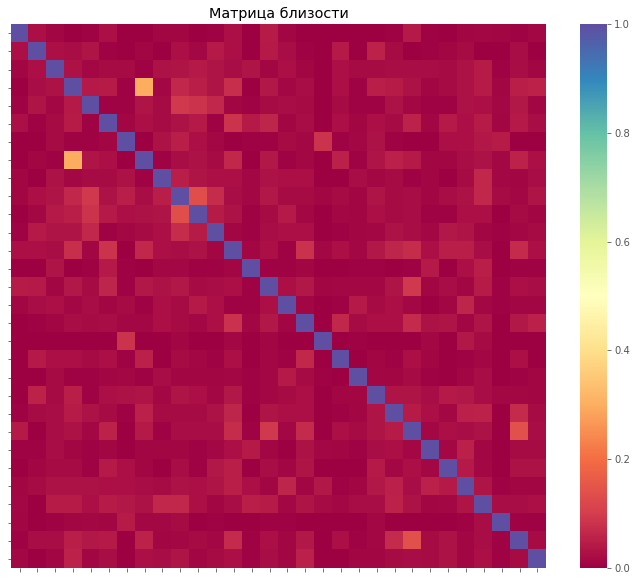

In [10]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

# tf-idf векторах
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# создание случайной выборки
sampling_tfidf = random.choices(corpus_tfidf, k=30)

# вычисление сходства по косинусной мере на tf-idf векторах
index = similarities.MatrixSimilarity(sampling_tfidf)
sims = index[sampling_tfidf]

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

## LSI (LSA)

Данная модель реализована в библиотеке `gensim`.

In [11]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=20, chunksize=50)

In [12]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False) # можно показать не все темы, а только часть

[(0,
  [('год', 0.37685261496034844),
   ('город', 0.23365046220761712),
   ('салехард', 0.2155548991750232),
   ('работа', 0.17158479684939004),
   ('день', 0.14835110883068858),
   ('человек', 0.14298072611275486),
   ('россия', 0.12248783757212399),
   ('ребенок', 0.12091673090479456),
   ('городской', 0.10904850693247384),
   ('округ', 0.10412368839396716)]),
 (1,
  [('год', -0.3707260440151335),
   ('война', -0.1943153519055783),
   ('салехард', 0.17001024421786756),
   ('город', 0.15275502194199414),
   ('сторона', 0.13621043183883472),
   ('полиция', 0.12744644814555064),
   ('победа', -0.12661435463463),
   ('работа', 0.11123239848303894),
   ('великий', -0.10784913271890878),
   ('май', -0.10224170897891326)]),
 (2,
  [('война', -0.19738780953476345),
   ('победа', -0.1569303476290113),
   ('социальный', -0.15342346075796565),
   ('россия', 0.14143704261763446),
   ('июнь', 0.138776559682956),
   ('улица', 0.1357567207808184),
   ('библиотека', 0.12897529227952428),
   ('год',

Посмотрим, как снижение размерности влияет на матрицу близости. 

**NB!** Это не те же самые тексты, что на предыдущей картинке, просто другие случайные 30.

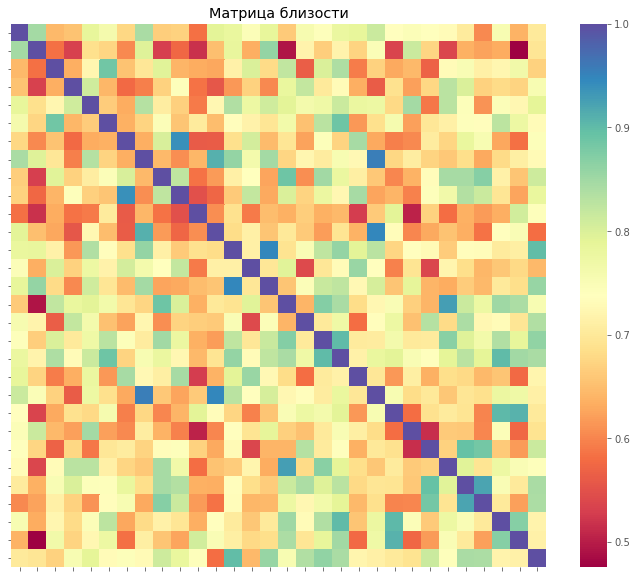

In [13]:
sampling = random.choices(corpus, k=30)

sampling_lsi = lsi[sampling]
index = similarities.MatrixSimilarity(lsi[sampling])
sims = index[sampling_lsi]
sims  = (sims + 1)/2.

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

## LDA

Данная модель также реализована в библиотеке `gensim`. Один из ее плюсов в том, что можно дообучать готовую модель (а отличие от LSA и pLSA, где даже при добавлении одного нового документа приходится обучать модель с нуля).

In [14]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

Training model...
Wall time: 21.8 s


In [15]:
lda.show_topics(num_topics=5, num_words=10, formatted=False)

[(17,
  [('-', 0.027139531),
   ('год', 0.013591349),
   ('зырянин', 0.008487297),
   ('александр', 0.008136378),
   ('написать', 0.0071233003),
   ('жизнь', 0.0069715385),
   ('путь', 0.0067909956),
   ('работать', 0.006758359),
   ('смерть', 0.0066299513),
   ('служить', 0.006527992)]),
 (19,
  [('год', 0.05027296),
   ('обдорск', 0.02588423),
   ('русский', 0.0152272),
   ('север', 0.012690327),
   ('век', 0.011329643),
   ('первый', 0.011120653),
   ('северный', 0.011036167),
   ('сибирь', 0.010240931),
   ('обдорский', 0.010174131),
   ('россия', 0.008400448)]),
 (11,
  [('вода', 0.020473776),
   ('год', 0.015421258),
   ('салехард', 0.013129102),
   ('сообщать', 0.011019596),
   ('дело', 0.010898765),
   ('устанавливать', 0.010870391),
   ('факт', 0.010450788),
   ('находиться', 0.010316352),
   ('случай', 0.009459841),
   ('вид', 0.009288408)]),
 (9,
  [('округ', 0.018680487),
   ('год', 0.016062962),
   ('проект', 0.014693652),
   ('ямал', 0.012475975),
   ('регион', 0.01176236

### LDAVis

LDAVis выдает интерактвную визуализацию тем и слов, которые их определяют. Это выглядит вот так:

![](./img/ldavis.png)

In [16]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 6min 6s


[Вот тут](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart) можно почитать про разные способы визуализации для тематического моделирования и посмотреть примеры кода.

## t-SNE

Подробнее об алгоритме см. в [тетрадке про снижение размерности](https://github.com/ancatmara/data-science-nlp/blob/master/3.%20DimReduction.ipynb). Главный его минус, пожалуй, в том, что красивую картинку он выдает почти всегда, но при этом часто она может быть очень далека от действительности...

### Способ №1: yellowbrick

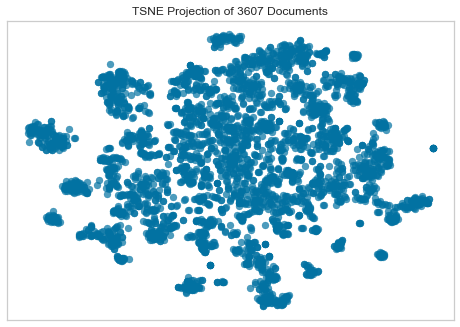

In [17]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE

data = [' '.join(text) for text in tokenized_texts]
vect = TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1,3), analyzer='word', stop_words = sw)
X = vect.fit_transform(data)
X.shape

tsne = TSNEVisualizer()
tsne.fit(X)
tsne.poof()

Можно сделать раскрасить проекцию по каким-нибудь атрибутам — например, найти кластеры с помощью KMeans и обозначить их разными цветами.

In [18]:
clf = KMeans(n_clusters=5)
clf.fit_transform(X)
colors = ["c{}".format(c) for c in clf.labels_]

tsne = TSNEVisualizer()
tsne.fit(X, colors)
tsne.poof()

NameError: name 'KMeans' is not defined

### Способ №2: sklearn

In [ ]:
from sklearn.cluster import *
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

In [ ]:
X_reduced = PCA(n_components=30, random_state=42).fit_transform(X.todense())
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

In [ ]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'cluster': colors})
sns.FacetGrid(vis_df, hue='cluster', height=10).map(plt.scatter, "X", "Y").add_legend()

### Что еще посмотреть?

Также можно извлечь ключевые слова для каждой темы и добавить их на график. [Вот хороший тьюториал](https://shuaiw.github.io/2016/12/22/topic-modeling-and-tsne-visualzation.html) о том, как это сделать. 

И еще неплохой [тьюториал по тематическому моделированию](https://nlpforhackers.io/topic-modeling/), где показана другая библиотека для визуализации — `bokeh`.

### Как оценить результаты?

Самый простой способ — попытаться интерпретировать темы «на глаз». Провести автоматическую оценку качества тематического моделирования, особенно внешнюю (extrinsic) сложнее, и здесь до сих пор нет четкого стандарта по метрикам. Вот несколько материалов, где предлагаются варианты решения этой проблемы.

* [Лекция Лоры Дитц из университета Маннхайма](http://topicmodels.info/ckling/tmt/part4.pdf)
* [Оценка «связности» тем (с примерами кода)](https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/)
* [Оценка с помощью библиотеки `tmtoolkit`](https://datascience.blog.wzb.eu/2017/11/09/topic-modeling-evaluation-in-python-with-tmtoolkit/)
* [Обсуждение на Quora](https://www.quora.com/What-are-good-ways-of-evaluating-the-topics-generated-by-running-LDA-on-a-corpus)

## Задание

Возьмите любой большой корпус текстов и попробуйте на нем тематическое моделирование. Если нет своих интересных данных, то можно взять [корпус региональной прессы](https://www.dropbox.com/s/46mn8dp3l3jgkx0/regional_papers.rar?dl=0). 

Сравните разные алгоритмы тематического моделирования. Визуализируйте результаты, раскрасьте проекции (по любым атрибутам), добавьте на график метки документов и/или топ-3 слов для каждой из получившихся тем. Хорошо ли интерпретируются полученные темы? Если нет, то почему? Что сделать, чтобы это улучшить?